In [238]:
import pandas as pd
import seaborn as sns
from pydataset import data
import matplotlib.pyplot as plt

import math
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')



In [323]:
NAME='nhtemp' # AirPassengers, nottem, nhtemp
df = data(NAME)
df[:5]

,time,nhtemp
1,1912,49.9
2,1913,52.3
3,1914,49.4
4,1915,51.1
5,1916,49.4


<AxesSubplot:xlabel='time', ylabel='nhtemp'>

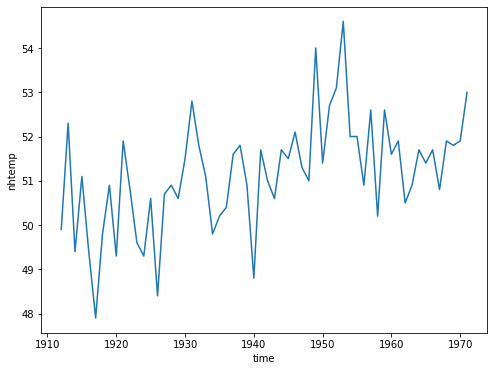

In [324]:
plt.figure(figsize=(8,6))
sns.lineplot(data=df,x='time',y=NAME)

(47.9, 54.6)

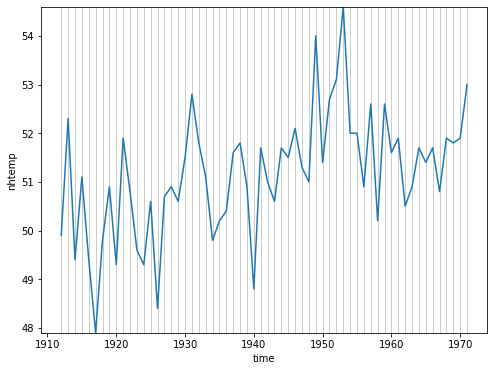

In [325]:
plt.figure(figsize=(8,6))
sns.lineplot(data=df,x='time',y=NAME)
x = list(range(int(min(df['time'])),int(max(df['time'])+1)))
for _ in x:
    sns.lineplot(x=_,y=[min(df[NAME]),max(df[NAME])],lw=1,color='black')
plt.ylim(min(df[NAME]),max(df[NAME]))

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

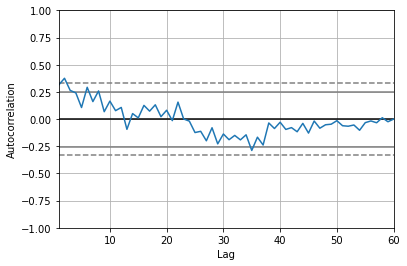

In [326]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df[NAME])

                               SARIMAX Results                                
Dep. Variable:                 nhtemp   No. Observations:                   60
Model:                ARIMA(13, 1, 5)   Log Likelihood                 -82.556
Date:                Fri, 22 Oct 2021   AIC                            203.111
Time:                        19:29:52   BIC                            242.584
Sample:                             0   HQIC                           218.520
                                 - 60                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6274      0.433      1.450      0.147      -0.221       1.476
ar.L2          0.0796      0.470      0.169      0.866      -0.842       1.002
ar.L3         -0.7846      0.451     -1.741      0.0

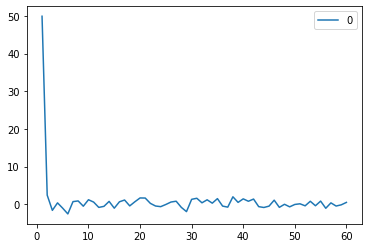

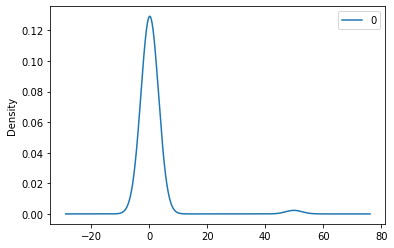

               0
count  60.000000
mean    0.990244
std     6.498933
min    -2.581190
25%    -0.541066
50%     0.312300
75%     0.831194
max    49.900000


In [327]:
# fit an ARIMA model and plot residual errors
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(df[NAME], order=(13,1,5))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [328]:
Y = df[NAME].values
split = int(len(Y) * 0.6)
_train = Y[:split]
test = Y[split:]
train = [x for x in _train]
predictions = list()

for t in range(len(test)):
	model = ARIMA(train, order=(5,1,0))
	model_fit = model.fit()
	out = model_fit.forecast()
	predictions.append(out[0])
	obs = test[t]
	train.append(obs)
	print(f'TEST = {out[0]} - PRED = {obs}')
rmse = math.sqrt(mean_squared_error(df[NAME][split:], predictions))
print(f"RMSE: {rmse}")


TEST = 50.784810226004915 - PRED = 51.0
TEST = 50.619903487946544 - PRED = 54.0
TEST = 51.17062080517931 - PRED = 51.4
TEST = 51.14281664916672 - PRED = 52.7
TEST = 51.77747743292924 - PRED = 53.1
TEST = 51.32851976022238 - PRED = 54.6
TEST = 52.554237245768256 - PRED = 52.0
TEST = 52.590698915335345 - PRED = 52.0
TEST = 52.050111523673316 - PRED = 50.9
TEST = 51.16986409455654 - PRED = 52.6
TEST = 51.232774024835614 - PRED = 50.2
TEST = 51.2069696145499 - PRED = 52.6
TEST = 51.10547398923082 - PRED = 51.6
TEST = 51.6604545756519 - PRED = 51.9
TEST = 51.28280257920894 - PRED = 50.5
TEST = 51.57326604017651 - PRED = 50.9
TEST = 50.81299608872507 - PRED = 51.7
TEST = 51.1071175465407 - PRED = 51.4
TEST = 51.13188554351375 - PRED = 51.7
TEST = 51.39378333469255 - PRED = 50.8
TEST = 51.31484511415463 - PRED = 51.9
TEST = 51.19028315448769 - PRED = 51.8
TEST = 51.45948667827586 - PRED = 51.9
TEST = 51.437812412100655 - PRED = 53.0
RMSE: 1.2860839246386153


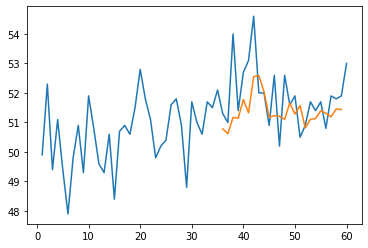

In [329]:
plt.plot(df[NAME])
plt.plot(range(split,len(Y)),predictions)

In [311]:
Y = df[NAME].values
split = int(len(Y) * 0.8)
_train = Y[:split]

df_result = pd.DataFrame()

for p in [0,1,2,3,4]:
    for d in [0,1,2]:
        for q in [0,1,2]:
            test = Y[split:len(Y)]
            train = [x for x in _train] 
            predictions = list()
            for t in range(len(test)):
                model = ARIMA(train, order=(p,d,q))
                model_fit = model.fit()
                out = model_fit.forecast()
                predictions.append(out[0])
                obs = test[t]
                train.append(obs)
            rmse = math.sqrt(mean_squared_error(df[NAME][split:], predictions))
            df_result = df_result.append({'p':int(p),'d':int(d),'q':int(q),'rmse':rmse}, ignore_index=True)
            print(f"ARIMA({p},{d},{q}) - RMSE = {rmse}")

ARIMA(0,0,0) - RMSE = 0.7957288698752761
ARIMA(0,0,1) - RMSE = 0.7506850155495473
ARIMA(0,0,2) - RMSE = 0.7247008450189428
ARIMA(0,1,0) - RMSE = 0.7788880963698628
ARIMA(0,1,1) - RMSE = 0.68487955929164
ARIMA(0,1,2) - RMSE = 0.685646890495312
ARIMA(0,2,0) - RMSE = 1.555367052068752
ARIMA(0,2,1) - RMSE = 0.7859746508245449
ARIMA(0,2,2) - RMSE = 0.826729224579866
ARIMA(1,0,0) - RMSE = 0.7181339134423425
ARIMA(1,0,1) - RMSE = 0.6771694167064692
ARIMA(1,0,2) - RMSE = 0.681048623553312
ARIMA(1,1,0) - RMSE = 0.6723751734255328
ARIMA(1,1,1) - RMSE = 0.6859166508804019
ARIMA(1,1,2) - RMSE = 0.7674481118329518
ARIMA(1,2,0) - RMSE = 0.8990630407601118
ARIMA(1,2,1) - RMSE = 0.671103918988333
ARIMA(1,2,2) - RMSE = 0.8566326829382518
ARIMA(2,0,0) - RMSE = 0.6898196882947603
ARIMA(2,0,1) - RMSE = 0.6850926864773347
ARIMA(2,0,2) - RMSE = 0.7786172301598123
ARIMA(2,1,0) - RMSE = 0.684455829666182
ARIMA(2,1,1) - RMSE = 0.6610859632309156
ARIMA(2,1,2) - RMSE = 0.7929612591153308
ARIMA(2,2,0) - RMSE = 0.

KeyboardInterrupt: 

<AxesSubplot:xlabel='d', ylabel='q'>

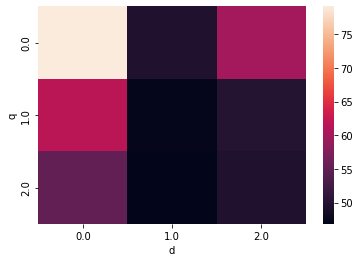

In [ ]:
__ = df_result[['q','d','rmse']]
__ = __.groupby(['q','d'],as_index=False).mean()
_ = __.pivot('q','d','rmse')
sns.heatmap(_)

<AxesSubplot:xlabel='q', ylabel='p'>

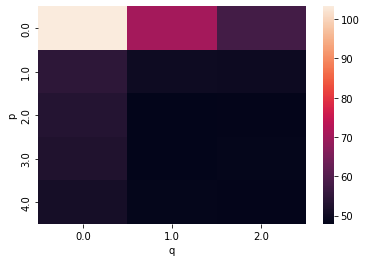

In [211]:
__ = df_result[['p','q','rmse']]
__ = __.groupby(['p','q'],as_index=False).mean()
_ = __.pivot('p','q','rmse')
sns.heatmap(_)

<AxesSubplot:xlabel='d', ylabel='p'>

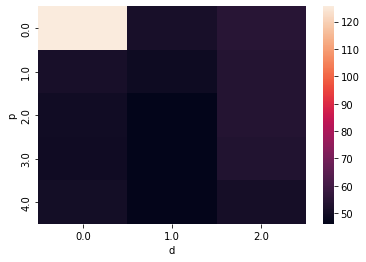

In [212]:
__ = df_result[['p','d','rmse']]
__ = __.groupby(['p','d'],as_index=False).mean()
_ = __.pivot('p','d','rmse')
sns.heatmap(_)